<a href="https://colab.research.google.com/github/nakyeong-kim/Python_Advanced/blob/main/2_3_Concurrency%2BCPU_Bound_vs_I_O_Bound.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 3. Concurrency, CPU Bound vs. I/O Bound

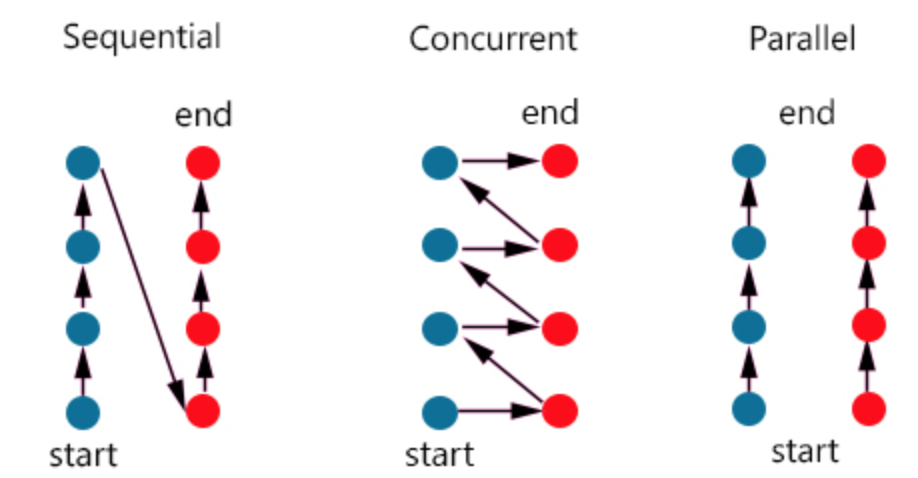

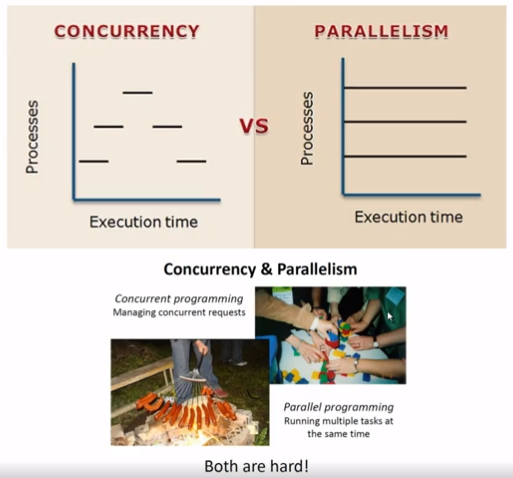

<br>

* Concurrency (동시성)
  - CPU 가용성 극대화를 위해 parallelism의 단점 및 어려움을 소프트웨어(구현) 레벨에서 해결하기 위한 방법
  - 싱글 코어에서 멀티스레드로 작업을 처리
  - 동시 작업에 있어서 일정량 처리 후 다음 작업으로 넘기는 방식
  - 즉, 제어권을 주고 받으며 작업을 처리하는 패턴
  - 병렬적은 아니나, 유사한 처리 방식임

* Concurrency(동시성) vs. Parrallelism(병렬성)
  - Concurrency : 논리적, 동시 실행 패턴(논리적), 싱글코어&멀티코어에서 실행 가능, 한 개의 작업 공유 처리, 디버깅 매우 어려움, Mutex, DeadLock
  - Parralelism : 물리적, 물리적으로 동시 실행, 멀티코어에서 구현 가능, 주로 별개의 작업을 처리, 디버깅 어려움, OpenMP, MPI, CUDA

<br><br>

----

<br><br>

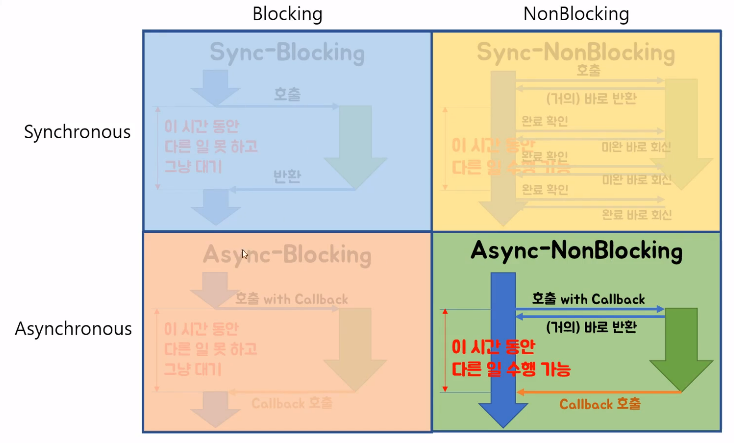

<br>

* Blocking I/O vs. Non-blocking I/O

  - Blocking I/O
      - 시스템 콜 요청 시 → 커널 I/O 작업 완료 시까지 응답 대기 == 응답이 오기 전까지 다음 작업 실행 X. 무한 대기.
          * 시스템 콜 : 파일 읽어줘, DB에서 값을 가져와, 네이버 신문기사 크롤링해와 등의 코드
      - 제어권이 I/O 작업에서 → 커널이 소유 → 응답(Response) 전까지 대기(Block) → 다른 작업 수행 불가(대기)
  
  - Non-blocking I/O
      - 시스템 콜 요청 시 → 커널 I/O 작업 완료 여부 상관없이 즉시 응답 == 응답이 오기 전까지 다른 작업 실행 가능
      - 제어권이 I/O 작업에서 → user process로 → 다른 작업 수행 가능(지속) → 주기적으로 시스템 콜 통해서 I/O 작업 완료 여부 확인

  - Async(비동기) vs. Sync(동기)
      - Async : I/O 작업 완료 여부에 대한 Notification은 커널(호출되는 함수)에서 → 유저 프로세스(호출하는 함수)
          * ex) 빨래방에 맡긴 빨래가 완료되면 말해줌 (callback 함수)
      - Sync : I/O 작업 완료 여부에 대한 Notification은 유저 프로세스(호출하는 함수)에서 → 커널(호출되는 함수)
          * ex) 빨래방에 맡긴 빨래가 완료됐는지 내가 계속 확인

<br>

※ Blocking I/O도 컴퓨터가 빠르므로 코딩을 잘하면 괜찮지만, 추세는 Non-blocking I/O <br>
※ 가장 많이 사용하는 것이 Async non-blocking I/O

<br><br>

----

<br><br>

* Multiprocessing vs. Threading vs. Async I/O

  - CPU Bound vs. I/O Bound

    - CPU Bound
      - 프로세스 진행이 CPU 속도에 의해 제한(결정) == CPU 속도가 빠를 수록 좋음 → 행렬 곱, 고속 연산, 압축 파일, 집합 연산 등
      - CPU 연산 위주 작업
    
    - I/O Bound
      - 작업에 의해서 병목(수행시간)이 결정 → 파일 쓰기, 디스크 작업, 네트워크 통신, 시리얼 포트 송/수신
      - CPU 성능 지표가 수행시간 단축에 크게 영향을 끼치지 않음

<br>
※ 작업 목적에 따른 적절한 동시성 라이브러리 선택이 중요
<br><br>

* 최종 비교

    - Multiprocessing : Multiple processes, 고가용성(CPU) Utilization 등은 CPU Bound로 처리
        * ex) 10개 부엌, 10명 요리사, 10개 요리
    - Threading : Single(Multi) process, Multiple threads, OS decides task switching 등은 Fast I/O Bound
        * ex) 1개 부엌, 10명 요리사, 10개 요리
    - AsyncIO : Single process, single thread, cooperative multitasking, tasks cooperatively decide switching 등은 Slow I/O Bound
        * ex) 1개 부엌, 1명 요리사, 10개 요리

<br><br>